In [1]:
# Lets import all the necessary libraries
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister, execute
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import QFT
from numpy import pi

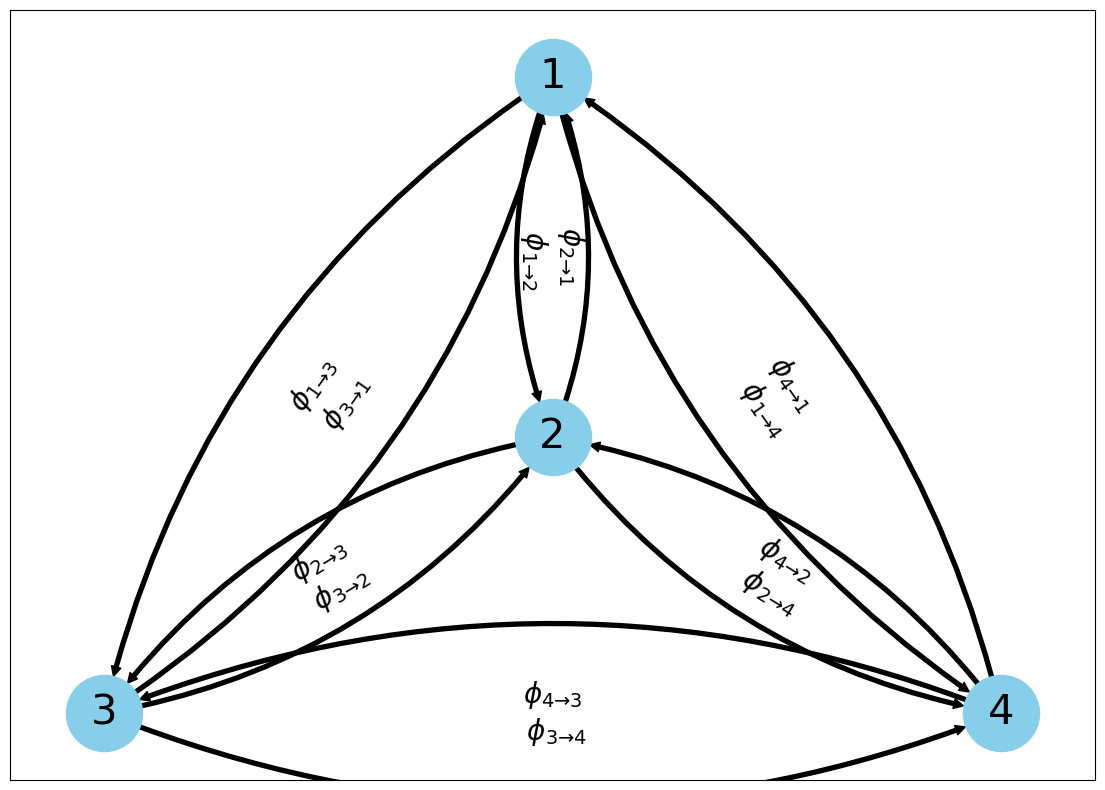

In [7]:
# Building the graph with nodes = 4

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(directed=True)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)

G.add_edge(2, 1)
G.add_edge(2, 3)
G.add_edge(2, 4)

G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(3, 4)

G.add_edge(4, 1)
G.add_edge(4, 2)
G.add_edge(4, 3)

pos = {1: [0.75, 1.0],
      2: [0.75, 0.15],
      3: [0.5, -0.5],
      4: [1.0, -0.5]}


edge_labels = {(1, 2): '$\\phi_{2\\to 1}$\n $\\phi_{1\\to 2}$',
              (1, 3): '$\\phi_{1\\to 3}$\n $\\phi_{3\\to 1}$',
              (1, 4): '$\\phi_{4\\to 1}$\n $\\phi_{1\\to 4}$',
              (2, 3): '$\\phi_{2\\to 3}$\n $\\phi_{3\\to 2}$',
              (2, 4): '$\\phi_{4\\to 2}$\n $\\phi_{2\\to 4}$',
              (3, 4): '$\\phi_{4\\to 3}$\n $\\phi_{3\\to 4}$'
              }

fig = plt.figure(1, figsize=(14, 10)) 
nx.draw_networkx(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos, connectionstyle='arc3, rad = 0.2', 
        node_size=3000, arrowsize=14, arrowstyle='simple', font_size=30)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20, bbox=dict(alpha=0))
 
plt.show()

In [8]:
at = 0
bt = pi/2
ct = pi/8
dt = pi/4

qt = QuantumRegister(3, 'qt')
qct = QuantumCircuit(qt)

qct.cp(ct - at, qt[0], qt[1])
qct.p(at, qt[0])
qct.cp(bt - at, qt[0], qt[2])

qct.cp((dt - ct + at - bt)/2, qt[1], qt[2])
qct.cx(qt[0], qt[1])
qct.cp(-(dt - ct + at - bt)/2, qt[1], qt[2])
qct.cx(qt[0], qt[1])
qct.cp((dt - ct + at - bt)/2, qt[0], qt[2])

qct.draw()

┌──────┐                                                      
qt_0: ─■───────┤ P(0) ├─■─────────────────────■───────────────■───■──────────
       │P(π/8) └──────┘ │                   ┌─┴─┐           ┌─┴─┐ │          
qt_1: ─■────────────────┼────────■──────────┤ X ├─■─────────┤ X ├─┼──────────
                        │P(π/2)  │P(-3π/16) └───┘ │P(3π/16) └───┘ │P(-3π/16) 
qt_2: ──────────────────■────────■────────────────■───────────────■──────────

In [9]:
backend_unitary_t = Aer.get_backend('unitary_simulator')
job_unitary_t = execute(qct, backend_unitary_t, shots=8192)
count_unitary_t = job_unitary_t.result().get_unitary()
array_to_latex(count_unitary_t, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [10]:
ai = 0
bi = pi/2
ci = pi/8
di = pi/4

qi = QuantumRegister(3, 'qi')
qci = QuantumCircuit(qi)


qci.cp(ci - ai, qi[2], qi[1])
qci.p(ai, qi[2])
qci.cp(bi - ai, qi[2], qi[0])

qci.cp((di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp(-(di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp((di - ci + ai - bi)/2, qi[2], qi[0])

qci.draw()

qi_0: ──────────────────■────────■────────────────■───────────────■──────────
                        │        │P(-3π/16) ┌───┐ │P(3π/16) ┌───┐ │          
qi_1: ─■────────────────┼────────■──────────┤ X ├─■─────────┤ X ├─┼──────────
       │P(π/8) ┌──────┐ │P(π/2)             └─┬─┘           └─┬─┘ │P(-3π/16) 
qi_2: ─■───────┤ P(0) ├─■─────────────────────■───────────────■───■──────────
               └──────┘

In [11]:
backend_unitary_i = Aer.get_backend('unitary_simulator')
job_unitary_i = execute(qci, backend_unitary_i, shots=8192)
count_unitary_i = job_unitary_i.result().get_unitary()
array_to_latex(count_unitary_i, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

In [12]:
def controlled_unitary(qc, qubits: list, phases: list): # x,y,z = Specific Qubit; a,b,c,d = Phases
    qc.cp(phases[2]-phases[0], qubits[0], qubits[1]) # controlled-U1(c-a)
    qc.p(phases[0], qubits[0]) # U1(a)
    qc.cp(phases[1]-phases[0], qubits[0], qubits[2]) # controlled-U1(b-a)
    
    # controlled controlled U1(d-c+a-b)
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp(-(phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[0], qubits[2])

In [13]:
def U(times, qc, unit, eigen, phases: list): # a,b,c = phases for U1; d,e,f = phases for U2; g,h,i = phases for U3; j,k,l = phases for U4; m_list=[m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l]
    controlled_unitary(qc, [unit[0] ]+eigen[0:2], [0]+phases[0:3])
    controlled_unitary(qc, [unit[0] ]+eigen[2:4], [phases[3] ]+[0]+phases[4:6])
    controlled_unitary(qc, [unit[0] ]+eigen[4:6], phases[6:8]+[0]+[phases[8] ])
    controlled_unitary(qc, [unit[0] ]+eigen[6:8], phases[9:12]+[0])

In [14]:
def final_U(times, eigen, phases: list):
    unit = QuantumRegister(1, 'unit')
    qc = QuantumCircuit(unit, eigen)
    for _ in range(2**times):
        U(times, qc, unit, eigen, phases)
    return qc.to_gate(label='U'+'_'+(str(2**times)))

In [15]:
# Storing the eigenvalues in a list
eigen_values = ["11000110", "10001101", "11001001"]

# Function to place appropriate corresponding gate according to eigenstates
def eigenstates(qc, eigen, index):
    for i in range(0, len(eigen)):
        if eigen_values[index][i] == '1':
            qc.x(eigen[i])
        if eigen_values[index][i] == '0':
            pass
    qc.barrier()
    return qc

In [18]:
# Initialization
unit = QuantumRegister(6, 'unit')
eigen = QuantumRegister(8, 'eigen')
unit_classical = ClassicalRegister(6, 'unit_classical')
qc = QuantumCircuit(unit, eigen, unit_classical)
#

# Setting one eigenstate 
# Playing with the first eigenstate here i.e. 11000110 from eigen_values list.
# (Try to play with other eigenstates from the eigen_values list)
eigenstates(qc, eigen, 0)
# 

# Hadamard on the 'unit' qubits
qc.h(unit[:])
qc.barrier()
#

# Controlled Unitary  
phases = [pi / 2, pi / 8, pi / 4, pi / 2, pi / 4, pi / 4, pi / 8, pi / 4, pi / 8, pi / 4, pi / 4, pi / 8] # a, b, c, d, e, f, g, h, i, j, k, l
for i in range(0, 6):
    qc.append(final_U(i, eigen, phases), [unit[5-i] ] + eigen[:])
#

# Inverse QFT 
qc.barrier()
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT')
qc.append(qft, qc.qubits[:len(unit)])
qc.barrier()
#

# Measure
qc.measure(unit, unit_classical)
#

# Draw
qc.draw()

░ ┌───┐ ░                                          »
          unit_0: ──────░─┤ H ├─░──────────────────────────────────────────»
                        ░ ├───┤ ░                                 ┌───────┐»
          unit_1: ──────░─┤ H ├─░─────────────────────────────────┤0      ├»
                        ░ ├───┤ ░                         ┌──────┐│       │»
          unit_2: ──────░─┤ H ├─░─────────────────────────┤0     ├┤       ├»
                        ░ ├───┤ ░                 ┌──────┐│      ││       │»
          unit_3: ──────░─┤ H ├─░─────────────────┤0     ├┤      ├┤       ├»
                        ░ ├───┤ ░         ┌──────┐│      ││      ││       │»
          unit_4: ──────░─┤ H ├─░─────────┤0     ├┤      ├┤      ├┤       ├»
                        ░ ├───┤ ░ ┌──────┐│      ││      ││      ││       │»
          unit_5: ──────░─┤ H ├─░─┤0     ├┤      ├┤      ├┤      ├┤       ├»
                  ┌───┐ ░ └───┘ ░ │      ││      ││      ││      ││       │»
         eigen_0: ┤ X ├─░───────░─┤1     ├┤1     ├┤1     ├┤1     ├┤1      ├»
                  └───┘ ░       ░ │      ││      ││      ││      ││       │»
         eigen_1: ──────░───────░─┤2     ├┤2     ├┤2     ├┤2     ├┤2 U_16 ├»
                        ░       ░ │      ││      ││      ││  U_8 ││       │»
         eigen_2: ──────░───────░─┤3     ├┤3     ├┤3 U_4 ├┤3     ├┤3      ├»
                        ░       ░ │      ││  U_2 ││      ││      ││       │»
         eigen_3: ──────░───────░─┤4 U_1 ├┤4     ├┤4     ├┤4     ├┤4      ├»
                  ┌───┐ ░       ░ │      ││      ││      ││      ││       │»
         eigen_4: ┤ X ├─░───────░─┤5     ├┤5     ├┤5     ├┤5     ├┤5      ├»
                  ├───┤ ░       ░ │      ││      ││      ││      ││       │»
         eigen_5: ┤ X ├─░───────░─┤6     ├┤6     ├┤6     ├┤6     ├┤6      ├»
                  └───┘ ░       ░ │      ││      ││      ││      ││       │»
         eigen_6: ──────░───────░─┤7     ├┤7     ├┤7     ├┤7     ├┤7      ├»
                  ┌───┐ ░       ░ │      ││      ││      ││      ││       │»
         eigen_7: ┤ X ├─░───────░─┤8     ├┤8     ├┤8     ├┤8     ├┤8      ├»
                  └───┘ ░       ░ └──────┘└──────┘└──────┘└──────┘└───────┘»
unit_classical: 6/═════════════════════════════════════════════════════════»
                                                                           »
«                  ┌───────┐ ░ ┌──────────────┐ ░ ┌─┐               
«          unit_0: ┤0      ├─░─┤0             ├─░─┤M├───────────────
«                  │       │ ░ │              │ ░ └╥┘┌─┐            
«          unit_1: ┤       ├─░─┤1             ├─░──╫─┤M├────────────
«                  │       │ ░ │              │ ░  ║ └╥┘┌─┐         
«          unit_2: ┤       ├─░─┤2             ├─░──╫──╫─┤M├─────────
«                  │       │ ░ │  Inverse QFT │ ░  ║  ║ └╥┘┌─┐      
«          unit_3: ┤       ├─░─┤3             ├─░──╫──╫──╫─┤M├──────
«                  │       │ ░ │              │ ░  ║  ║  ║ └╥┘┌─┐   
«          unit_4: ┤       ├─░─┤4             ├─░──╫──╫──╫──╫─┤M├───
«                  │       │ ░ │              │ ░  ║  ║  ║  ║ └╥┘┌─┐
«          unit_5: ┤       ├─░─┤5             ├─░──╫──╫──╫──╫──╫─┤M├
«                  │       │ ░ └──────────────┘ ░  ║  ║  ║  ║  ║ └╥┘
«         eigen_0: ┤1      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
«                  │  U_32 │ ░                  ░  ║  ║  ║  ║  ║  ║ 
«         eigen_1: ┤2      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
«                  │       │ ░                  ░  ║  ║  ║  ║  ║  ║ 
«         eigen_2: ┤3      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
«                  │       │ ░                  ░  ║  ║  ║  ║  ║  ║ 
«         eigen_3: ┤4      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
«                  │       │ ░                  ░  ║  ║  ║  ║  ║  ║ 
«         eigen_4: ┤5      ├─░──────────────────░──╫──╫──╫──╫──╫──╫─
«                  │       │ ░                  ░  ║  ║  ║  ║  ║  ║ 
«         eigen_5: ┤6      ├─░──────────────────░─

{'100000': 8192}


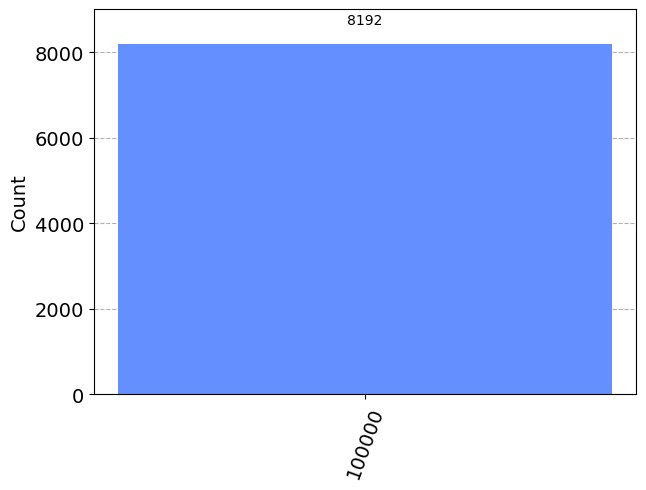

In [19]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)